<a href="https://colab.research.google.com/github/wksiazak/Decision-Tree---glass_data/blob/master/Decision_Tree_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Intro

The goal of this exercise is to create Decsision Tree Model which will predict category of glass based on some features. I will try to use different parameteres to find the best accuracy.  

## Initial data analysis

In [52]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,  cross_val_score

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_validate

import numpy as np

from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

from collections import Counter

import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                214 non-null    int64  
 1   refractive index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type              214 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB


In [ ]:
glass.shape

(214, 11)

In [ ]:
glass.head()

,ID,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [ ]:
glass.describe()

,ID,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [4]:
glass['Type'].unique()

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype=object)

In [5]:
glass['Type'].value_counts()

Type
building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: count, dtype: int64

In [6]:
glass.isna().sum()

ID                  0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type                0
dtype: int64

In [7]:
y = glass['Type']
X = glass.drop(columns=['Type', 'ID']) # ID column also needs to be deleted as does not bring any value

## Decision Tree - first general model with default parameteres

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.88      0.64      0.74        11
building_windows_non_float_processed       0.65      0.85      0.73        13
                          containers       0.60      1.00      0.75         3
                           headlamps       0.89      0.73      0.80        11
                           tableware       1.00      0.50      0.67         2
     vehicle_windows_float_processed       0.33      0.33      0.33         3

                            accuracy                           0.72        43
                           macro avg       0.72      0.67      0.67        43
                        weighted avg       0.76      0.72      0.72        43



We see that model is overtrained on train data, on test data we see that model has quite good precision for some type of glass like " building_windows_float_processed", "headlamps" or "tableware" . Let's check what is depth and number of leaves in this model.  

In [14]:
dt.get_n_leaves()

41

In [15]:
dt.get_depth()

12

## Cross Validation - looking for the best parameteres

In [16]:
max_depth_values = [3,6,9,12,15]

In [17]:
mean_scores = []
std_scores = []
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(model, X, y, cv=5) # cross validation on whole data set, with no split
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

In [18]:
optimal_depth_index = np.argmax(mean_scores)
optimal_depth = max_depth_values[optimal_depth_index]

In [19]:

print("Cross val score for different depths of tree:")
for i, depth in enumerate(max_depth_values):
    print(f"Depth {depth}: Average = {mean_scores[i]}, Standard Deviation = {std_scores[i]}")

print(f"\nOptimal depth of tree in model: {optimal_depth}")

Cross val score for different depths of tree:
Depth 3: Average = 0.6077519379844961, Standard Deviation = 0.0799013874525589
Depth 6: Average = 0.5749723145071982, Standard Deviation = 0.05623860672747034
Depth 9: Average = 0.607641196013289, Standard Deviation = 0.048354565843615284
Depth 12: Average = 0.5699889258028792, Standard Deviation = 0.038784361709585886
Depth 15: Average = 0.5745293466223698, Standard Deviation = 0.061261033142752316

Optimal depth of tree in model: 3


## Decision Tree - second model with the best tree depth




In [20]:
dt_depth3 = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', min_samples_leaf = 3, class_weight = 'balanced')
dt_depth3.fit(X_train, y_train)
y_pred_depth3 = dt_depth3.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_depth3))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.71      0.45      0.56        11
building_windows_non_float_processed       0.73      0.62      0.67        13
                          containers       0.43      1.00      0.60         3
                           headlamps       1.00      0.73      0.84        11
                           tableware       1.00      1.00      1.00         2
     vehicle_windows_float_processed       0.12      0.33      0.18         3

                            accuracy                           0.63        43
                           macro avg       0.67      0.69      0.64        43
                        weighted avg       0.74      0.63      0.66        43



In this model we received slightly lower accuracy 63%, while in previous 70%, but precisions for particual types of glass is better -> less overfitted.

## Balanacing data -> Oversampling

After analyzing first two decision tree model we may notice that we do not have equally balanced data set - some type of glass are more than others which could cause wrong predictions.  Let's try to balanace data.

In [22]:
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [23]:
Counter(y_train_over)

Counter({'building_windows_non_float_processed': 63,
         'vehicle_windows_float_processed': 63,
         'containers': 63,
         'headlamps': 63,
         'building_windows_float_processed': 63,
         'tableware': 63})

## Deciscion Tree - third model after balancing data

In [24]:
model_over_depth3 = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
model_over_depth3.fit(X_train_over, y_train_over)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
y_pred_over_depth3 = model_over_depth3.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_over_depth3))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.78      0.64      0.70        11
building_windows_non_float_processed       0.67      0.62      0.64        13
                          containers       0.50      1.00      0.67         3
                           headlamps       0.89      0.73      0.80        11
                           tableware       1.00      1.00      1.00         2
     vehicle_windows_float_processed       0.20      0.33      0.25         3

                            accuracy                           0.67        43
                           macro avg       0.67      0.72      0.68        43
                        weighted avg       0.72      0.67      0.69        43



We see that after balancing data we are reciving much more realistic precision score for particular type of glass.

Before we will try another model let's check if some feature is more important than another by using **Feature Importance **

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.06712
Feature: 2, Score: 0.45280
Feature: 3, Score: 0.04043
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.20500
Feature: 6, Score: 0.06981
Feature: 7, Score: 0.16485
Feature: 8, Score: 0.00000


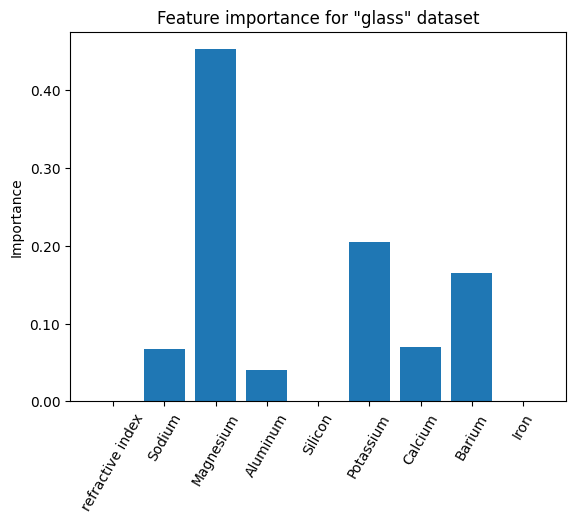

In [27]:
# get importance
importance = model_over_depth3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.title('Feature importance for "glass" dataset' )
formatter = FuncFormatter(lambda x, _: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel('Importance')
plt.show()

For next model let's remove features like "refractive index", 'Silicon' and "Iron".  

In [28]:
X_new = glass.drop(columns=['refractive index', 'Silicon', 'Iron', 'ID', 'Type'])
y_new = glass['Type']

## Decision Tree - fourth model after removing non-relevant features

In [29]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=123)

In [30]:
dt_updated = DecisionTreeClassifier(max_depth = 3)
dt_updated.fit(X_train_new, y_train_new)
y_pred_dt_update = dt_updated.predict(X_test_new)

In [31]:
print(classification_report(y_test_new, y_pred_dt_update))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.60      0.55      0.57        11
building_windows_non_float_processed       0.50      0.62      0.55        13
                          containers       0.43      1.00      0.60         3
                           headlamps       1.00      0.82      0.90        11
                           tableware       1.00      0.50      0.67         2
     vehicle_windows_float_processed       0.00      0.00      0.00         3

                            accuracy                           0.63        43
                           macro avg       0.59      0.58      0.55        43
                        weighted avg       0.64      0.63      0.62        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We see that even after removing non-relevant features model still has quite low accuracy 63%.  

Let's try another one with using Oversampling and cross validation for the best parameteres

## Decisison Tree - fifth model - using all previous improvements

In [32]:
over_2 = RandomOverSampler(random_state=123)
X_train_over_2, y_train_over_2 = over.fit_resample(X_train_new, y_train_new)

In [33]:
Counter(y_train_over_2)

Counter({'building_windows_non_float_processed': 63,
         'vehicle_windows_float_processed': 63,
         'containers': 63,
         'headlamps': 63,
         'building_windows_float_processed': 63,
         'tableware': 63})

In [35]:
dt_5 = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Grid search z walidacją krzyżową
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_over_2, y_train_over_2)

# Wyświetlenie najlepszych parametrów
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.90


In [40]:
dt_5_final = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', max_features = None, min_samples_leaf = 1 , min_samples_split = 2,  random_state=42)

In [41]:
dt_5_final.fit(X_train_over_2, y_train_over_2)
y_pred_dt_5_final = dt_5_final.predict(X_test_new)

In [43]:
print(classification_report(y_test_new, y_pred_dt_5_final))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.64      0.64      0.64        11
building_windows_non_float_processed       0.52      0.85      0.65        13
                          containers       0.50      0.33      0.40         3
                           headlamps       1.00      0.73      0.84        11
                           tableware       1.00      0.50      0.67         2
     vehicle_windows_float_processed       0.00      0.00      0.00         3

                            accuracy                           0.65        43
                           macro avg       0.61      0.51      0.53        43
                        weighted avg       0.66      0.65      0.63        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this model we received quite better accuracy for whole model  65%.

## ROC AUC Curve for the best and the worst model

After analyzing above model it is not clear which one is the best and which is the worst. As a worst I will use **second model** (in which we defined best tree depth in Cross validation, but data were not balanced) and as a best I will use **last model** (in which data are balanced and best parameteres were selected in Gread Search CV)

in progress